### Capstone - Web scraping

One important function of the keyboard is to be able to predict the most relevant characters/phrases when the user interacts with the keyboard. The group decides to use a frequency metric based on speech to distinguish more relevant characters/phrases from the less relevant ones.

We will be using a conversation-based corpus (weibo tweets corpus) for this. In this 1st part, I will be using web scraping tools to extract the relevant information required.

Import relevant modules

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import json

Example of data from the site, data contains both single character and multi-characters (phrases)

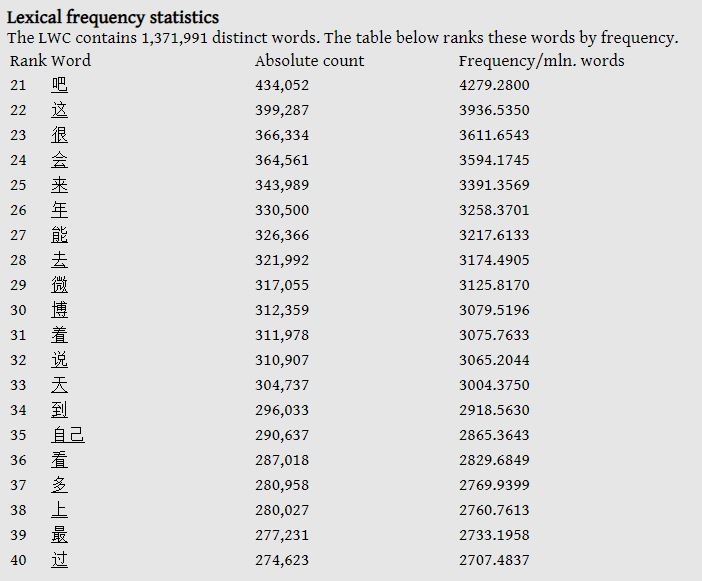

Viewing the nested data structure

In [2]:
url = 'http://lwc.daanvanesch.nl/frequentwords.php?'
response = requests.get(url) 
soup = BeautifulSoup(response.content,'html.parser')
print(soup.prettify())

<?xml version="1.0" encoding="UTF-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.1//EN" "http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd">
<html xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   Leiden Weibo Corpus
  </title>
  <meta content="application/xhtml+xml; charset=utf-8" http-equiv="content-type"/>
  <link href="http://fonts.googleapis.com/css?family=Gentium+Book+Basic&amp;subset=latin-ext,latin" rel="stylesheet" type="text/css"/>
  <link href="/jquery/css/jquery-ui-1.8.17.custom.css" rel="stylesheet" type="text/css"/>
  <style type="text/css">
   body {font-family: 'Gentium Book Basic', 'Microsoft JengHei', 'MingLiU', sans-serif;}
			a:link {color: #000000; text-decoration: underline; font-weight: none; font-family: 'Gentium Book Basic',sans-serif;}
			a:active {color: #000000; text-decoration: underline; font-weight: none; font-family: 'Gentium Book Basic',sans-serif;}
			a:visited {color: #000000; text-decoration: underline; font-weight: none; font-fami

Reading data

In [3]:
table = soup.find_all('table')
df = pd.read_html(str(table))
print(df[0])

       0     1               2                     3   4
0   Rank  Word  Absolute count  Frequency/mln. words NaN
1      1     的         4650143            45845.3460 NaN
2      2     我         2841511            28014.2040 NaN
3      3     了         2725964            26875.0365 NaN
4      4     不         1752436            17277.1106 NaN
5      5     是         1648662            16254.0119 NaN
6      6     你         1622660            15997.6605 NaN
7      7     一         1356666            13375.2493 NaN
8      8     在          992131             9781.3312 NaN
9      9     有          906700             8939.0746 NaN
10    10     个          856510             8444.2559 NaN
11    11     就          729449             7191.5728 NaN
12    12     人          651396             6422.0552 NaN
13    13     要          631789             6228.7515 NaN
14    14     好          628627             6197.5776 NaN
15    15     都          609802             6011.9836 NaN
16    16     也          504107 

Transforming the dataframe

In [4]:
df_new = df[0]
df_new

,0,1,2,3,4
0,Rank,Word,Absolute count,Frequency/mln. words,NaN
1,1,的,4650143,45845.3460,NaN
2,2,我,2841511,28014.2040,NaN
3,3,了,2725964,26875.0365,NaN
4,4,不,1752436,17277.1106,NaN
5,5,是,1648662,16254.0119,NaN
6,6,你,1622660,15997.6605,NaN
7,7,一,1356666,13375.2493,NaN
8,8,在,992131,9781.3312,NaN
9,9,有,906700,8939.0746,NaN


Transforming dataframe

In [5]:
def transform(df):
    df_new.rename(columns={0:"Rank",1:'Word',2:'Absolute Count',3:'Frequency/Million words',4:'NaN'},inplace=True)
    df_new.drop(columns=['Rank','NaN'],inplace=True)
    df_new.set_index('Word',inplace=True)
    df_new.drop('Word',inplace=True)
    return df_new

In [6]:
df_transform = transform(df_new)

Parsing dataframe into a JSON file

In [8]:
with open('all_characters2.json','w',encoding='utf-8') as data:
    all_words = json.loads('{}')
    for i in range(5):
        url = 'http://lwc.daanvanesch.nl/frequentwords.php?rank={}'.format(str((i*20)+1))
        response = requests.get(url)
        soup = BeautifulSoup(response.content,'html.parser')
        table = soup.find_all('table')
        df = pd.read_html(str(table))
        df_new = df[0]
        df_transform = transform(df_new)
        df_dict = df_transform.to_dict(orient='index')
        all_words.update(df_dict)
    json.dump(all_words,data)